### Import and examine the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import data with the header in mind
data = pd.read_csv("profiles.csv", header = 0)

#check the data
#data.head()

In [2]:
#before going further, let's determine some characteristics of the data
data.info()

#there are 59,946 rows of data with 19 columns of multiple choice answers and 10 essay answers (qualitative).
#most of the data is "object", meaning strings. height and income are the only given numeric. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [3]:
#essay questions and answers are qualitative so I want to have the data without them
chosen_columns = ["age", "body_type", "diet", "drinks", "drugs", "education","ethnicity", "height", "income", "job",
                      "last_online", "location","offspring", "orientation", "pets", "religion", "sex", "sign",
                     "smokes", "speaks", "status"]
reduced_data = data[chosen_columns]

#check the result
reduced_data.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
#I do see some NaN values. Let's see how many NaN values there are per column
reduced_data.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

### Explore the data using viz

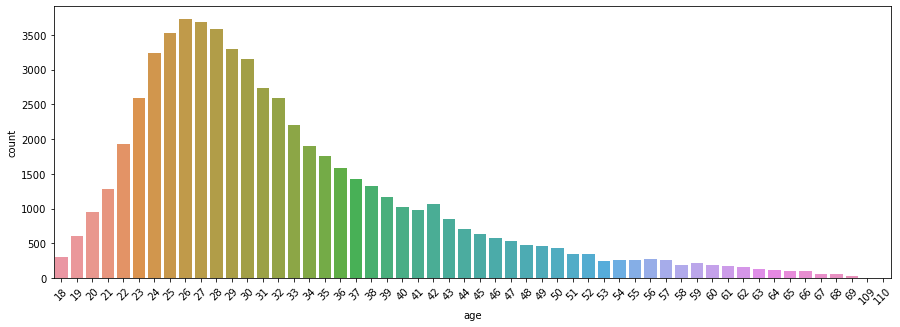

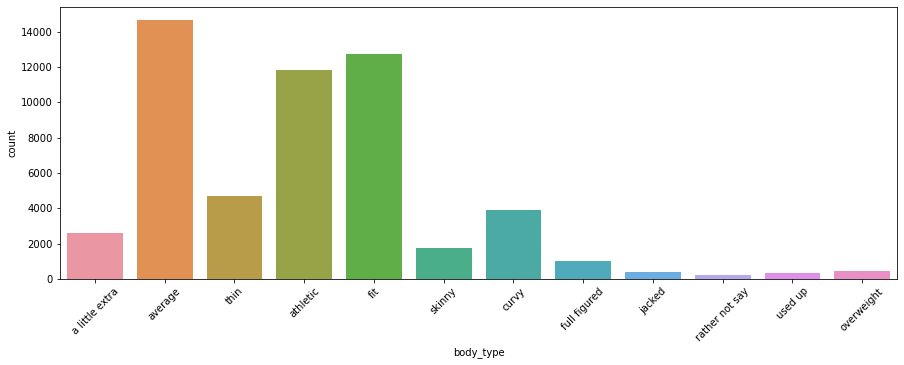

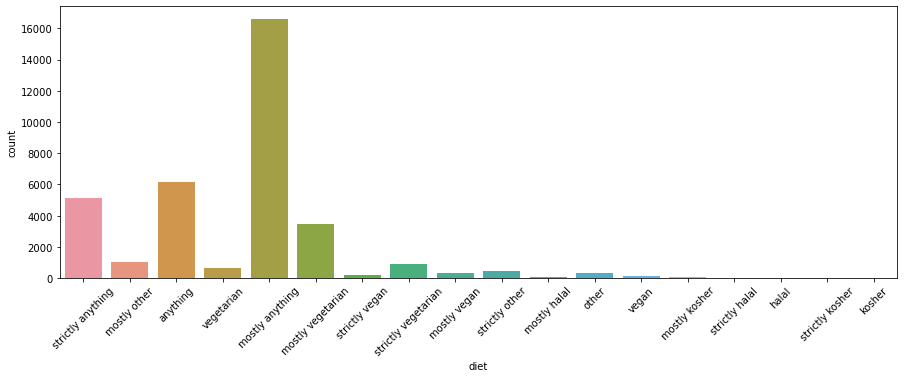

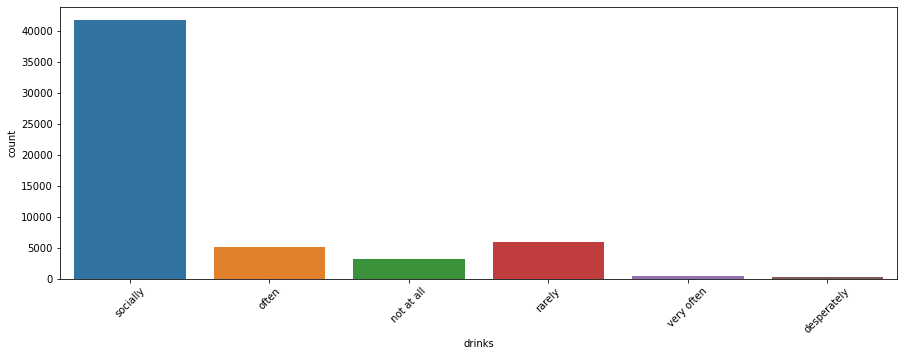

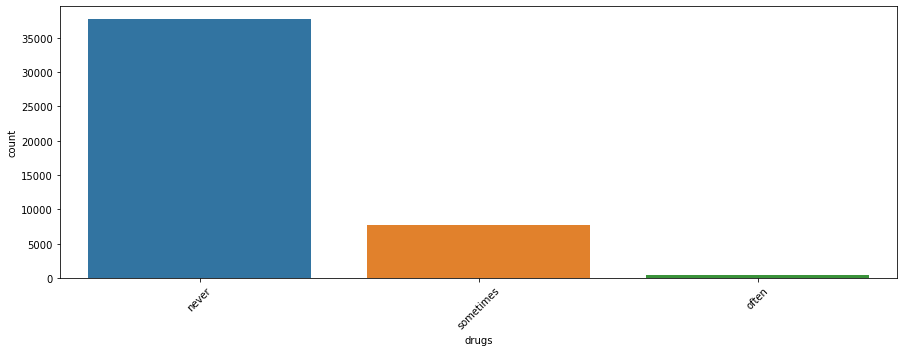

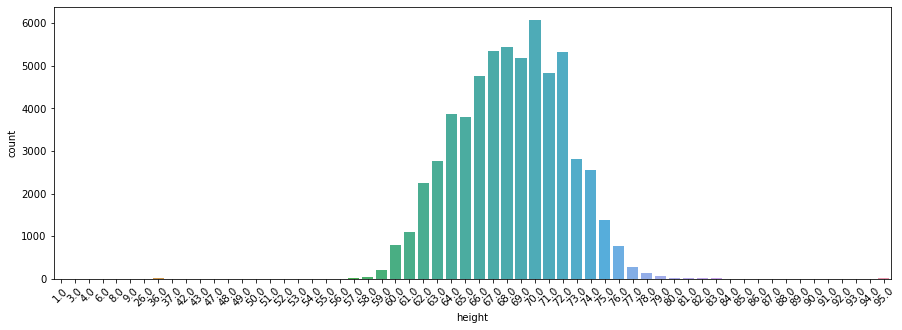

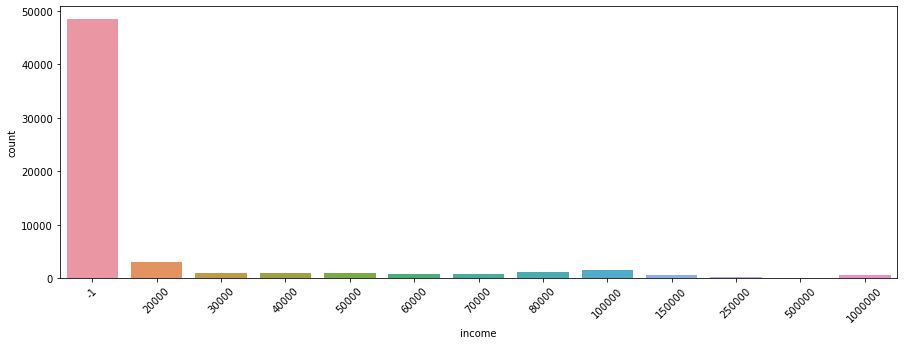

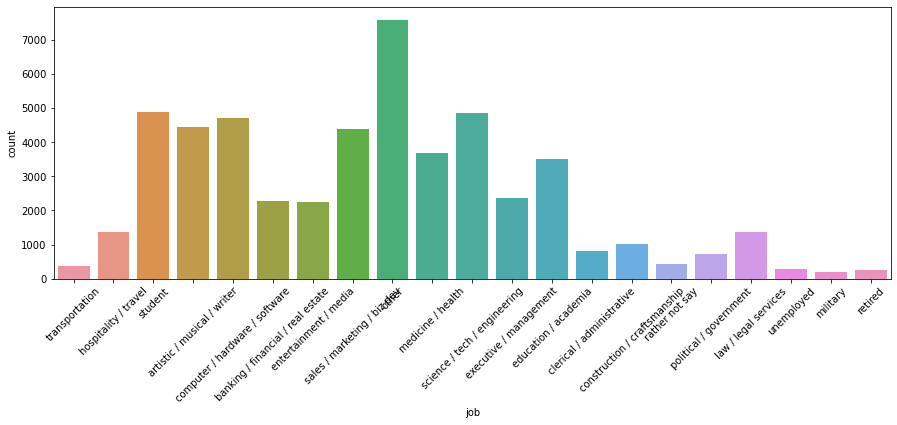

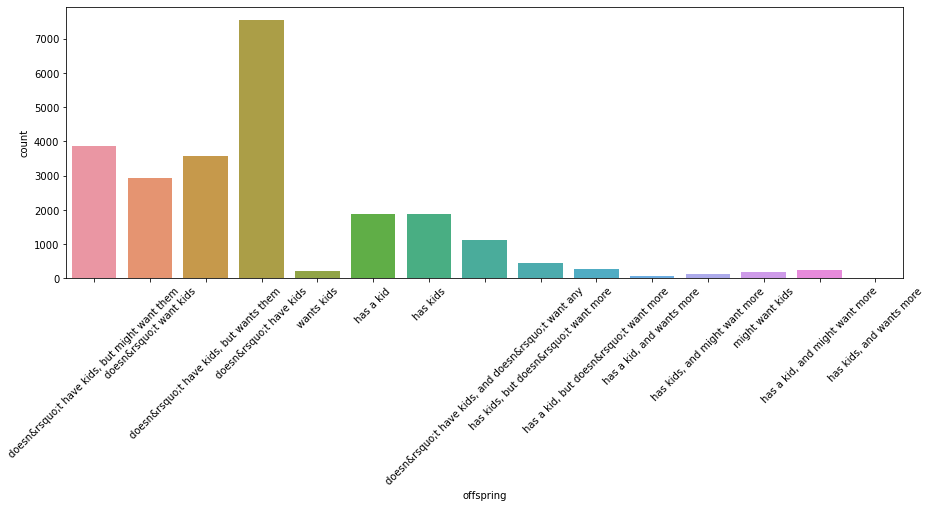

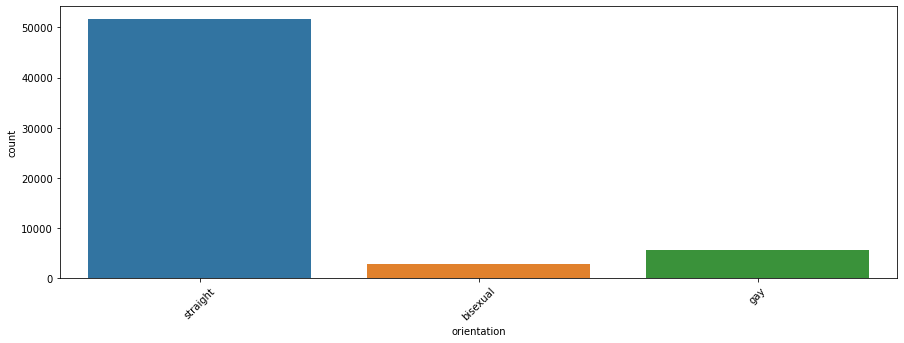

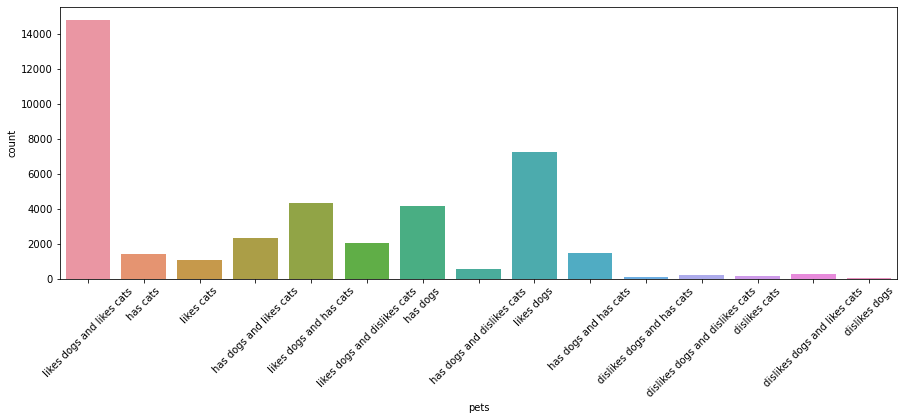

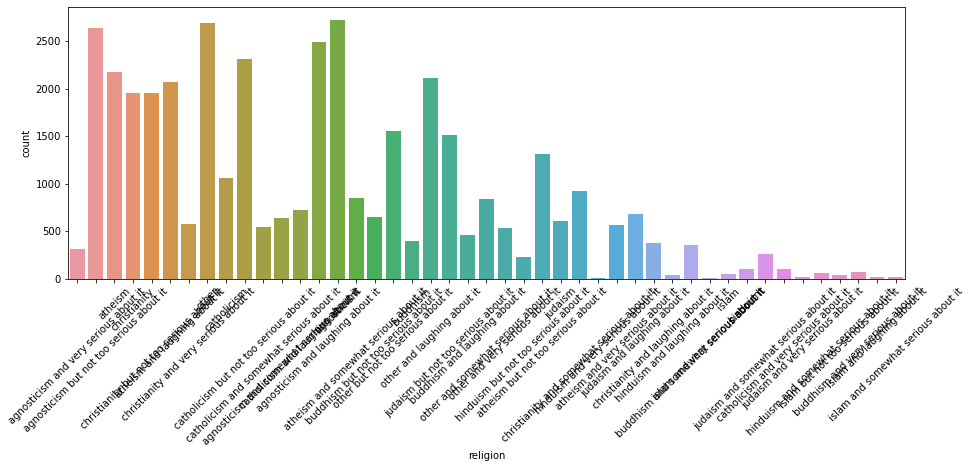

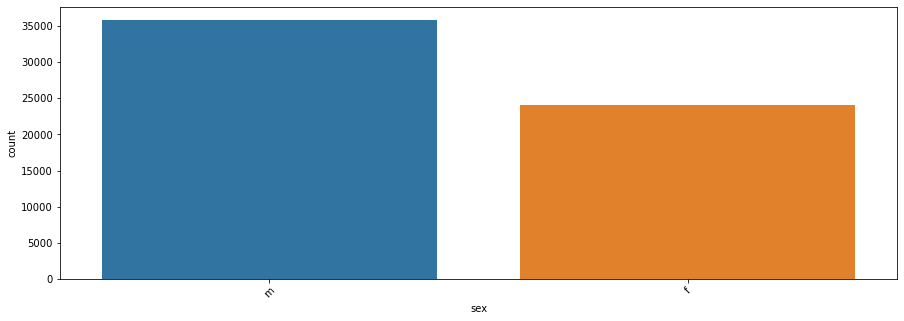

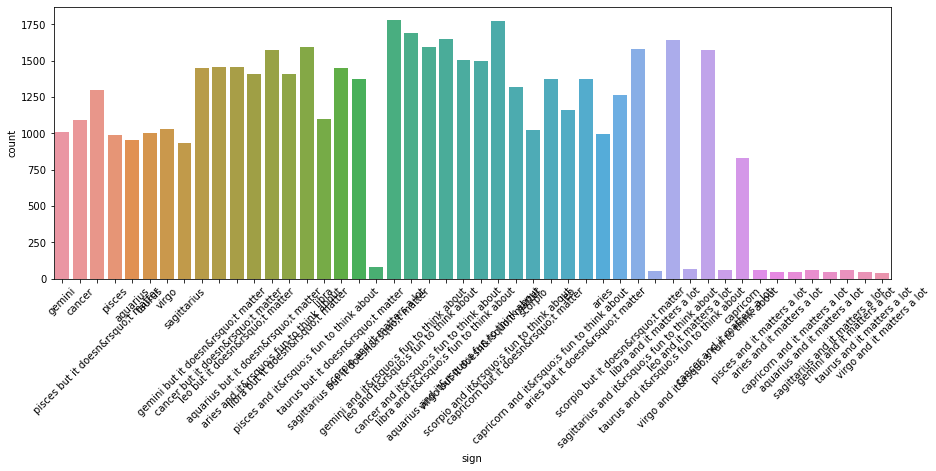

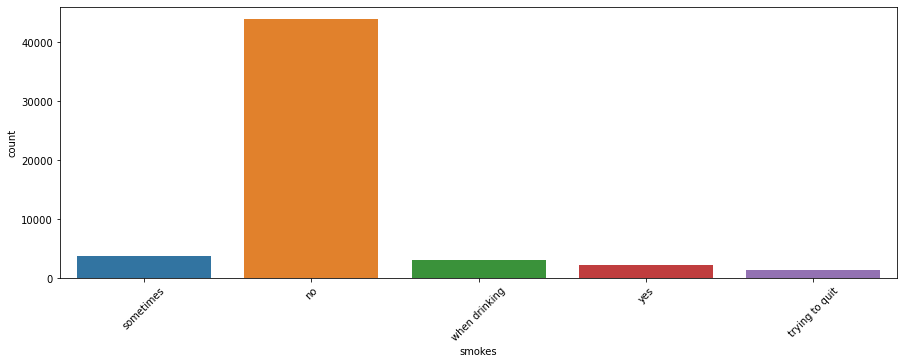

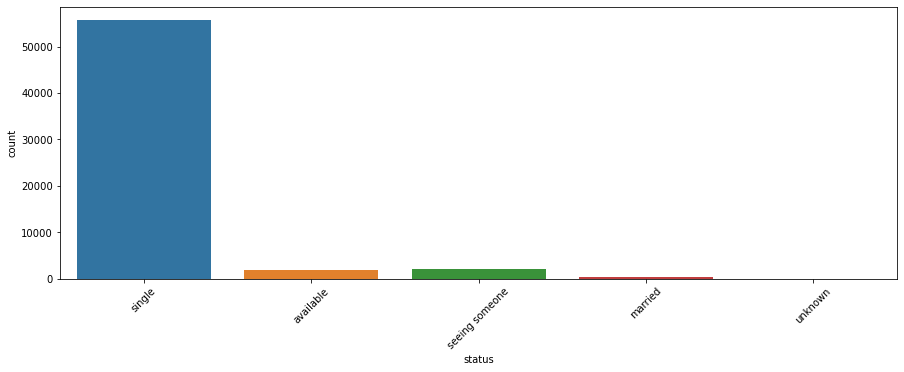

In [5]:
#seeing countplots for every column we chose
#It was taking too long, so I removed a few that wasn't helpful in this view 
#such as last_online, speaks, ethnicity, location, and education

limited_columns = ["age", "body_type", "diet", "drinks", "drugs", "height",
                   "income", "job","offspring", "orientation", "pets", "religion", "sex", "sign",
                     "smokes", "status"]
for col in limited_columns:
    plt.figure(figsize = (15,5))
    sns.countplot(x = reduced_data[col])
    plt.xticks(rotation = 45)
    plt.show()
    plt.clf


<b> A few observations here: </b> <br>
    1. age is right skewed with the mode being 26. Also there is a point for 109 and 110. I wonder if they are legitimate. <br>
    2. there is a "used up" body type. What is that? we may need to clarify what that means.  <br>
    3. drink is overwhelmingly done socially. <br>
    4. drug usage is also overwhelmingly never. <br>
    5. education, ethnicity, location, religion, and speaks are not clearn using the chart due to the text lengths. We will have to examine them separately.<br>
    6. heights seem to be close to normal distribution. I wonder if it would be more insightful with other categories, like sex. Also there seems to be a couple of outliers like 95 and 36. I wonder if they are legitimate <br>
    7. although income showed 0 NaN, according to the chart, most people did not answer the question and the NaN in this case is -1. <br>
    8. last_online and signs should be cleaned and grouped before exploration.<br>
    9. orientation is mostly straight. <br>
    10. there are more males than females. <br>
    11. smokes is overwhelmingly no.<br>
    12. status is overwhelmingly single. <br>

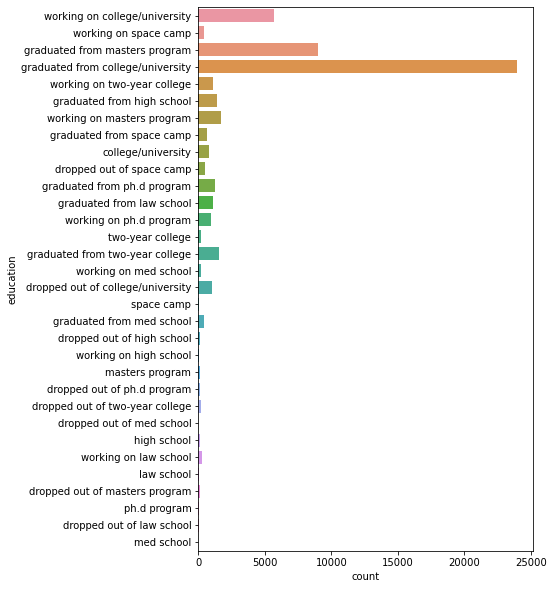

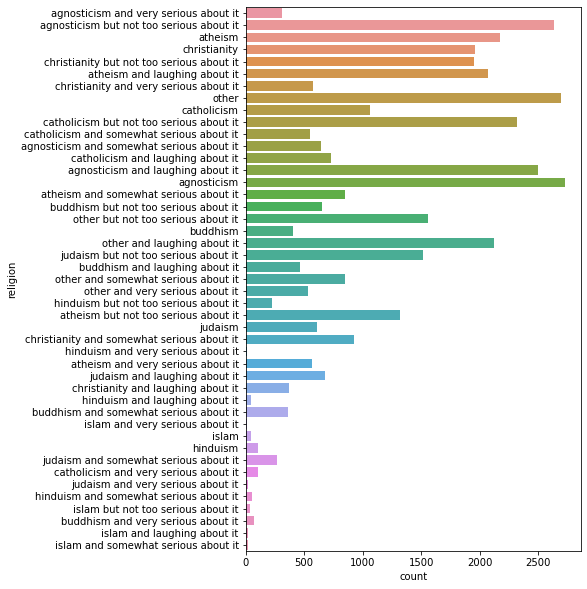

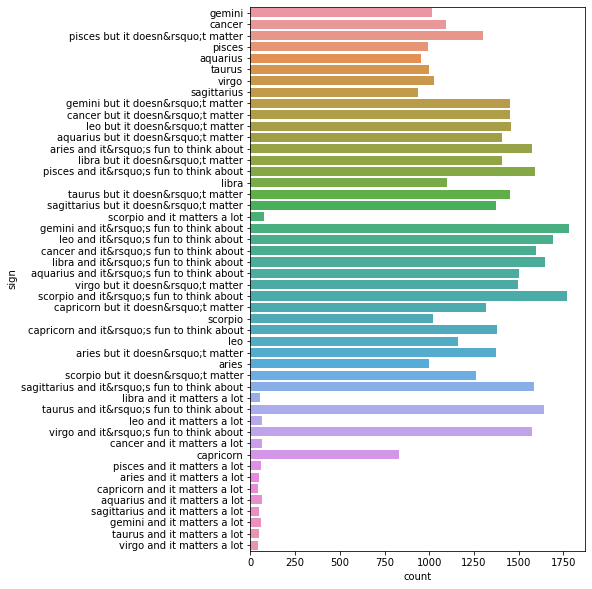

In [6]:
#For a couple of columns we could not observe due to text lengh, let's plot again but put them in y instead of x
#without cleaning or grouping, we still cannot see ethnicity, location, speaks, and last_online. So we won't look into them yet. 
columns_long_text = ["education", "religion", "sign"]
for col in columns_long_text:
    plt.figure(figsize = (6,10))
    sns.countplot(y = reduced_data[col])
    plt.show()
    plt.clf

A couple of observations here. <br> 
1. For education, graduated from college/university is the majority. <br>
2. For religion and sign, there seems to be a few religions & sign to distinguish (ex. for religion: agnosticism, christiantiy, atheism, catholicism, buddhism, judaism, islam, hinduism, and others) and also the degree of "seriousness" (lauhing about it > not too serious about it> somewhat serious about it > vrey serious about it). So if religion or sign is something you want to explore, then it can be thought of in two ways ; by type and also by degree. <br>

I am curious about the proportion of each religion. Let's clean it up and see the countplot again.

In [7]:
#Since the name of the religion is conveniently the first word of each choice, we will take the first word. 

reduced_data["cleaned_religion"] = reduced_data.religion.str.split().str[0]
reduced_data["cleaned_religion"]

<ipython-input-7-44817417aca7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data["cleaned_religion"] = reduced_data.religion.str.split().str[0]


0         agnosticism
1         agnosticism
2                 NaN
3                 NaN
4                 NaN
             ...     
59941     catholicism
59942     agnosticism
59943    christianity
59944     agnosticism
59945     catholicism
Name: cleaned_religion, Length: 59946, dtype: object

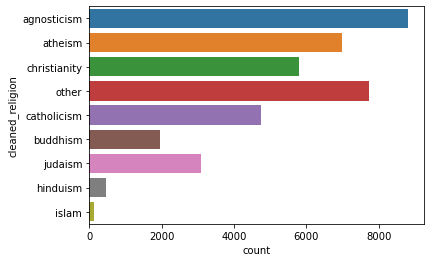

In [8]:
sns.countplot(y = reduced_data["cleaned_religion"])
plt.show()

Just like how we did religion, we can also do sign, if you are interested:

<ipython-input-9-59e0709a0150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data["cleaned_sign"] = reduced_data.sign.str.split().str[0]


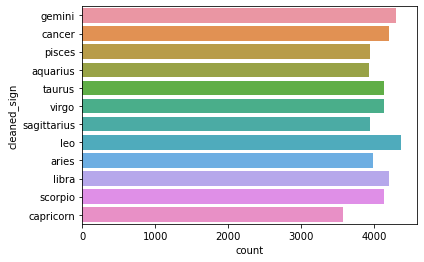

In [9]:
reduced_data["cleaned_sign"] = reduced_data.sign.str.split().str[0]
sns.countplot(y = reduced_data["cleaned_sign"])
plt.show()

#### By Sex

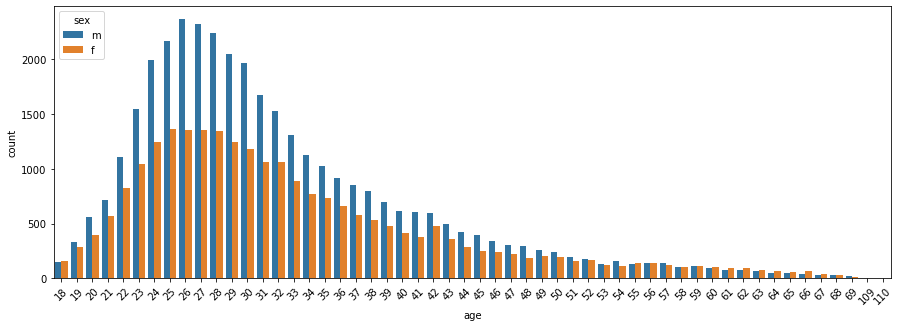

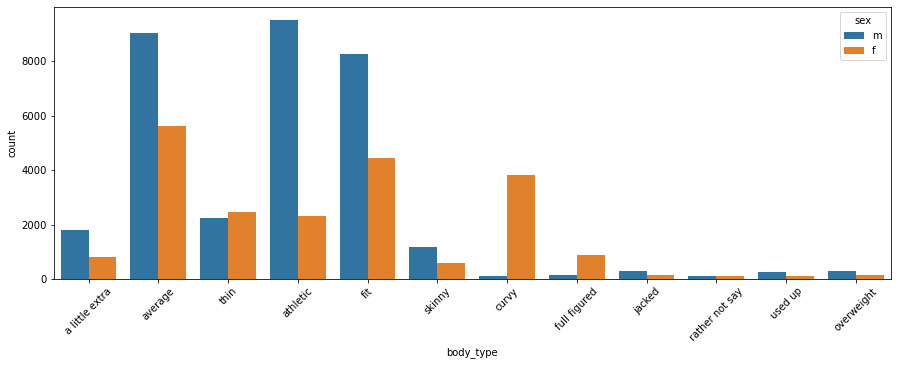

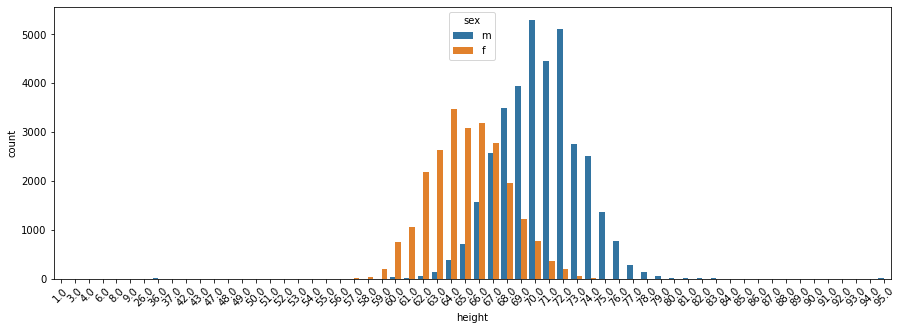

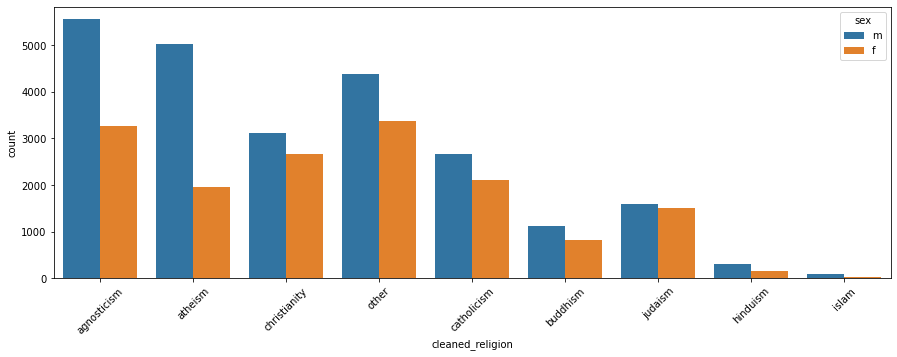

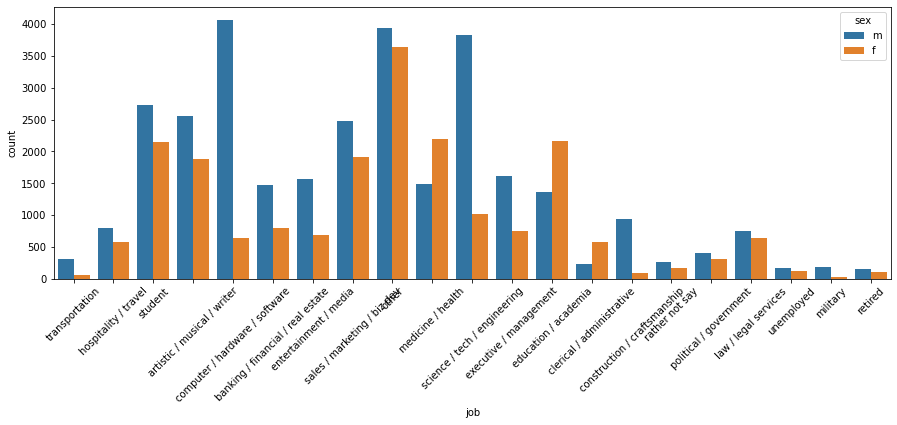

In [10]:
#Let's see if there is a distinctive trend for each sex in a few columns
columns_sex = ["age", "body_type", "height", "cleaned_religion", "job"]
for col in columns_sex:
    plt.figure(figsize = (15,5))
    sns.countplot(x = reduced_data[col], hue = reduced_data["sex"])
    plt.xticks(rotation = 45)
    plt.show()
    plt.clf

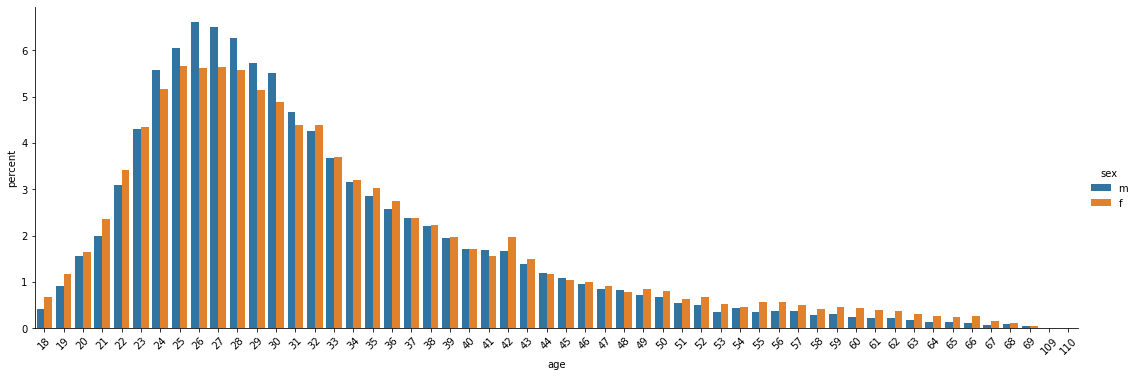

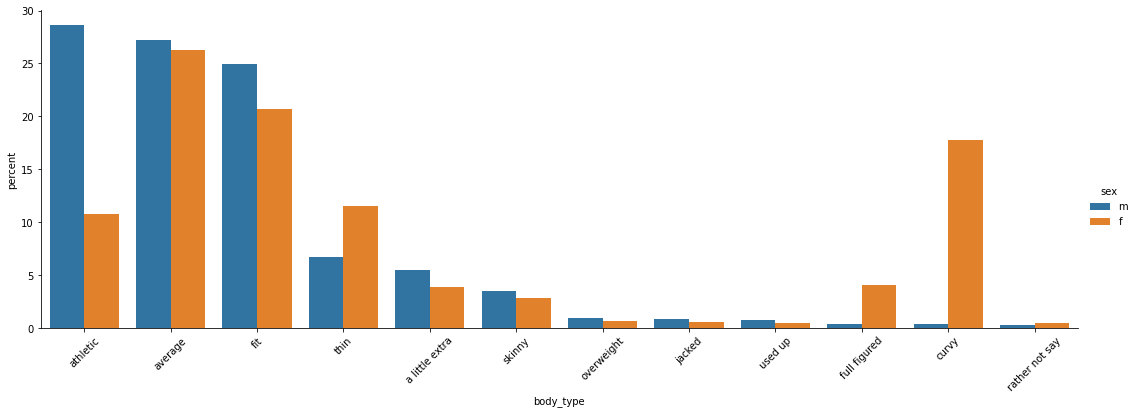

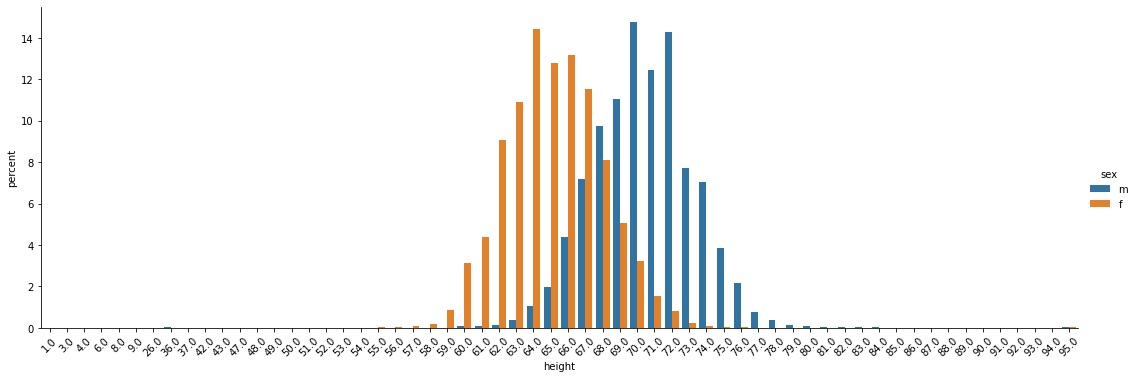

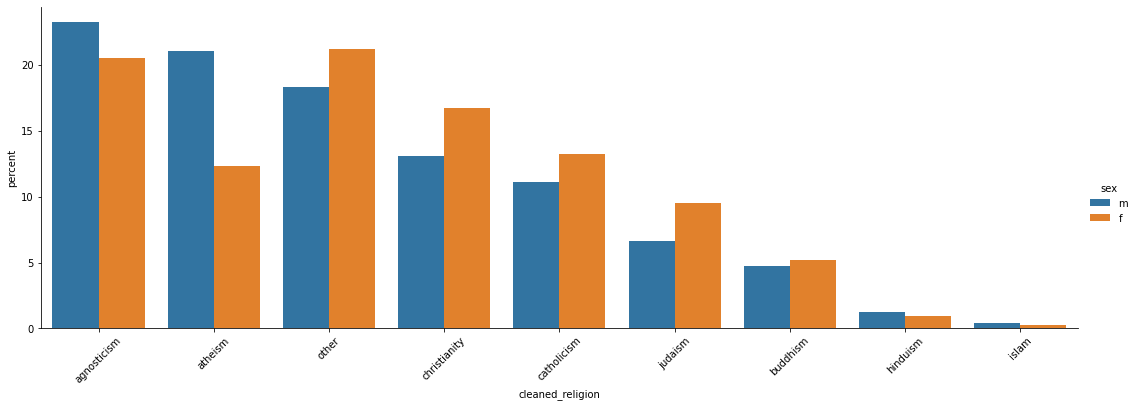

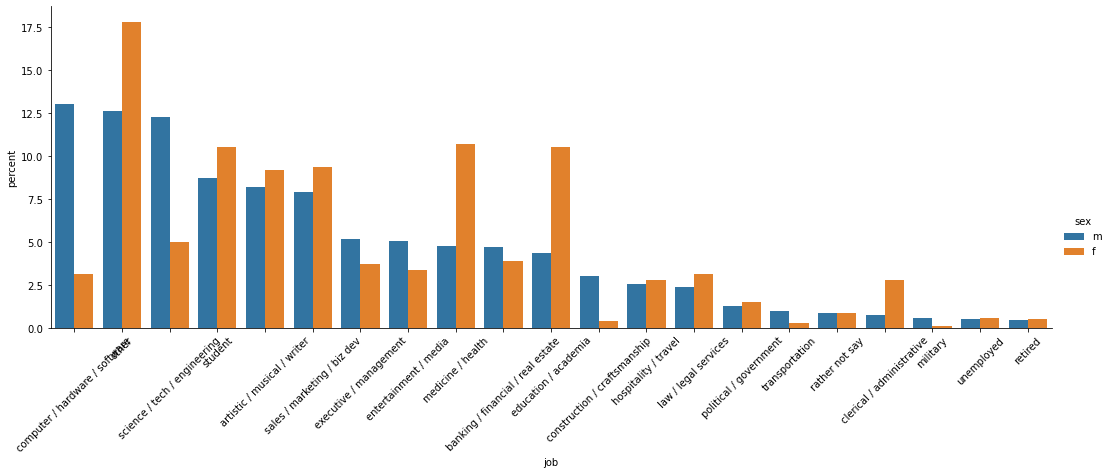

In [11]:
#Since there are noticeably more males than females, let's look at proportion for the same features
columns_sex = ["age", "body_type", "height", "cleaned_religion", "job"]

for col in columns_sex:
    df1 = reduced_data.groupby(["sex"], sort = False)[col].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()
    sns.catplot(x=col,y='percent',hue="sex",kind='bar',data=df1, height=5, aspect=15/5)
    plt.xticks(rotation = 45)
    plt.show()
    plt.clf

Sex definitely seems to hav effect on age, body_type, height, religion, and job. Now, will we be able to predict one's sex based on these features? 

Since sex is categorical variable, we will be looking at: <br>
logistic regression <br>
K-NearestNeighbors Classifier  <br>
Multinomial Naive Bayes <br>
Support Vector Machine <br>
Decision Tree & Random Forest <br>

Before we do this though, we need to go through preprocessing of the data. 

### Preprocessing

First, let's create a dataframe with only the columns we are intersted in, and then drop NaN value. 

In [12]:
#creating a new dataframe and drop NaN
#columns_sex has all the features I want to explore so I am going to add "sex" into the column and 
#use it to create the new dataframe
columns_sex.append("sex")
data_sex = reduced_data[columns_sex].dropna()

#since now we are only dealing with cleaned_religion, let's rename it to religion
data_sex = data_sex.rename(columns = {"cleaned_religion": "religion"})

#checking the data
data_sex.isna().sum()
data_sex.info()

#dropna() correctly dropped all the NaN values. Now, there are 33,988 profiles available

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33988 entries, 0 to 59945
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        33988 non-null  int64  
 1   body_type  33988 non-null  object 
 2   height     33988 non-null  float64
 3   religion   33988 non-null  object 
 4   job        33988 non-null  object 
 5   sex        33988 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.8+ MB


#### Removing outliers

There were age and height data that seemed incorrect such as age 109 but in graduate school and height 1 inch. I want to get rid of outliers for better model output. 

In [13]:
#Let's remove outliers for age and heights. We will use zscore and make sure all the data points are within -3 and 3.

from scipy import stats
data_sex = data_sex[(np.abs(stats.zscore(data_sex["age"])) < 3)]
data_sex = data_sex[(np.abs(stats.zscore(data_sex["height"])) < 3)]

#checking the result
data_sex.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33566 entries, 0 to 59945
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        33566 non-null  int64  
 1   body_type  33566 non-null  object 
 2   height     33566 non-null  float64
 3   religion   33566 non-null  object 
 4   job        33566 non-null  object 
 5   sex        33566 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.8+ MB


#### Categorical variables

To input data into ML models, we need to make sure the input data are numeric. There are a couple of options:  <br>
1. For binary or ordinal category, we can map the data. <br>
2. For other categorical values with no particular order and different degrees between values, we can create dummy variables, making each categorical value as a column and give a binary value. <br>
<br>
Since age and height are already numeric, we do not need to worry about them. But we do need to convert body type, religion, and job. These categories do not have any particular order, so we will want to use the dummy variable method. <br>
Sex does not need to be converted because that is the label, not input data. 

In [14]:
for col in ["body_type", "religion", "job"]:
    data_sex = pd.get_dummies(data_sex, columns=[col], prefix = [col])

data_sex.head()
#Now you see sex, age, height unchanged but then 
#body_type, religion, and job choices are individual features with binary answers per profile.

,age,height,sex,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,22,75.0,m,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,35,70.0,m,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,29,67.0,m,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,31,65.0,f,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,37,65.0,m,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Imbalance Classification Problem

As we saw before, there were noticeably more males than females in this dataset. This can cause an imbalance classification problem which indicates biased or skewed data. So let's see the cleaned data and see if the imbalance in the prediction label is enough to cause a concern.

In [15]:
data_sex.sex.value_counts()/len(data_sex)

m    0.612793
f    0.387207
Name: sex, dtype: float64

Out of 33,566 profiles, 61% is male and 39% is female, rendering 6:4 ratio. That is a slight imbalance and it is not as concerning. So we will proceed in this analsysis. 

#### Column Split between input data and label

To feed the data into machine learning models, we are separting here input vs. label (outcome). 

In [16]:
data_label = data_sex["sex"]
data_input = data_sex.drop(labels = "sex", axis = 1)

#checking the result
data_input.head()

,age,height,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,22,75.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,35,70.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,29,67.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,31,65.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,37,65.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Train Test Split

We will want to test out the model with test data, so I am splitting the current data so we can use 80% of it to train the model and 20% to test out the model.

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_input, data_label, train_size = 0.8, test_size = 0.2)

#### Scaling: Normalizing the numeric data

Lastly, we need to normalize the data so that the scale is the same. Without this step, your model may put heavier importance on a variable due to a different scale. 

In [18]:
from sklearn.preprocessing import StandardScaler

#iloc[:,0:2] is specifically choosing numeric data, and excluding the binary dummy variables.
x_temp = StandardScaler().fit_transform(x_train.iloc[:,0:2])
x_test_temp = StandardScaler().fit_transform(x_test.iloc[:,0:2])

#Concatenate non-categorical data and categorical
x_train = np.concatenate((x_temp,x_train.iloc[:,2:]),axis=1)
x_test = np.concatenate((x_test_temp,x_test.iloc[:,2:]),axis=1)


### Prediction

I am going to use logistic regression, KNN Classifier, and Random Forest and see which one has the best result. So let's create a model, fit the training data, and see the score for test data for each of them.

#### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logistic_m = LogisticRegression(solver='lbfgs', max_iter=3000)
logistic_m.fit(x_train, y_train)
logistic_m_prediction = logistic_m.predict(x_test)

logistic_m.score(x_test, y_test)

0.8739946380697051

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logistic_m_prediction))

              precision    recall  f1-score   support

           f       0.85      0.82      0.83      2596
           m       0.89      0.91      0.90      4118

    accuracy                           0.87      6714
   macro avg       0.87      0.86      0.87      6714
weighted avg       0.87      0.87      0.87      6714



#### K Nearest Neighbors Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn_m = KNeighborsClassifier(n_neighbors = 5)
knn_m.fit(x_train, y_train)
knn_m_prediction = knn_m.predict(x_test)

knn_m.score(x_test, y_test)

0.8467381590705988

In [22]:
print(classification_report(y_test, knn_m_prediction))

              precision    recall  f1-score   support

           f       0.82      0.77      0.80      2596
           m       0.86      0.90      0.88      4118

    accuracy                           0.85      6714
   macro avg       0.84      0.83      0.84      6714
weighted avg       0.85      0.85      0.85      6714



#### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_m = RandomForestClassifier(n_estimators = 7)
rf_m.fit(x_train, y_train)
rf_m_prediction = rf_m.predict(x_test)

rf_m.score(x_test, y_test)

0.8453976764968723

In [24]:
print(classification_report(y_test, rf_m_prediction))

              precision    recall  f1-score   support

           f       0.81      0.79      0.80      2596
           m       0.87      0.88      0.87      4118

    accuracy                           0.85      6714
   macro avg       0.84      0.84      0.84      6714
weighted avg       0.84      0.85      0.85      6714



All the models seem to be doing a pretty good job with similar score at predicting the gender based on age, height, body type, religion, and job: 84~87%. Since logistic regression did slightly better on the test data, let's see its confusion matrix before we finish.

### Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix 
logistic_cm = confusion_matrix(y_test, logistic_m_prediction)
cm_labels = logistic_m.classes_

logistic_cm

array([[2119,  477],
       [ 369, 3749]], dtype=int64)

Since the confusion matrix is hard to read without label, let's use a heatmap for quick interpretation.

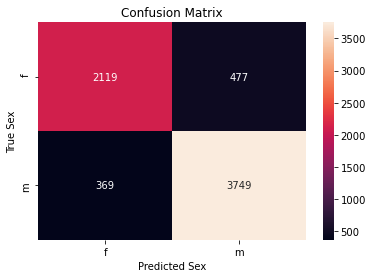

In [26]:
ax = plt.subplot()
sns.heatmap(logistic_cm, annot = True, fmt = "d")
ax.yaxis.set_tick_params()
ax.yaxis.set_ticklabels(cm_labels)
ax.xaxis.set_tick_params()
ax.xaxis.set_ticklabels(cm_labels)
ax.set_xlabel('Predicted Sex');
ax.set_ylabel('True Sex'); 
ax.set_title('Confusion Matrix');

### Conclusion

While exploring the data at hand, we saw different trends for age, height, body type, job, and religion for each sex. So we used machine learning algorithms to predict the sex of OkCupid user based on those features and see how accurate the models were. Currently we have the highest 87% score, which is definitely better than a random guess (50%). Based on the data exploration step, what other features do you think could be used to bring up the score even higher? <br>
<br>
It is also important to think about the business use cases. The sex prediction was a clean practice of machine learning, but it does not help OkCupid as much since it is unlike for people to not add sex, but then add all the other features in the profile. Thinking of that, what other category do you think OkCupid will benefit by predicting? And once you decide which category, can you think of the list of features you want to input to create models?